### Intro: For old wells, exponential smoothing is used for prediction. The Last 6 months avg. productions are predicted.

### 1. Importing packages

In [ ]:
!pip install statsmodels==0.13.1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing

### 2. Loading dataset

In [ ]:
exam_df = pd.read_csv('examSet.csv', index_col=1)
old_wells_df = exam_df.loc[291:, 'GAS_MONTH_1':'GAS_MONTH_30']
old_wells_df = old_wells_df.T

index = pd.date_range(start='2019-01-01', freq='M', periods=30)
old_wells_df.index = index

# replacing 0 with 0.1 for multiplicative models
old_wells_df.replace(0, 0.1, inplace=True)

old_wells_df.shape

(30, 29)

### 3. Modeling

In [ ]:
# months to be forecasted
n = 6

# matplot figure size
fig_size = (12, 8)

#### Simple exponential smoothing

In [ ]:
def ses(well_data):
    # fitting and forecasting with different alphas (smoothing levels)
    alphas = [0.2, 0.6]

    # alpha=0.2
    ses_fit1 = SimpleExpSmoothing(well_data, initialization_method='heuristic').fit(
                                  smoothing_level=alphas[0], optimized=False)
    ses_fcast1 = ses_fit1.forecast(n).rename(r'$\alpha=0.2$')

    # alpha=0.6
    ses_fit2 = SimpleExpSmoothing(well_data, initialization_method='heuristic').fit(
                                  smoothing_level=alphas[1], optimized=False)
    ses_fcast2 = ses_fit2.forecast(n).rename(r'$\alpha=0.6$')

    # letting statsmodels automatically find optimized alpha parameter
    ses_fit3 = SimpleExpSmoothing(well_data, initialization_method='estimated').fit()
    optim_alpha = ses_fit3.model.params['smoothing_level']
    ses_fcast3 = ses_fit3.forecast(n).rename(r'$\alpha={}$'.format(optim_alpha))

    # plotting fitted and forecasted values
    plt.figure(figsize=fig_size)
    plt.plot(well_data, marker='o', color='black')

    plt.plot(ses_fit1.fittedvalues, marker='o', color='blue')
    (line1,) = plt.plot(ses_fcast1, marker='o', color='blue')

    plt.plot(ses_fit2.fittedvalues, marker='o', color='red')
    (line2,) = plt.plot(ses_fcast2, marker='o', color='red')

    plt.plot(ses_fit3.fittedvalues, marker='o', color='green')
    (line3,) = plt.plot(ses_fcast3, marker='o', color='green')

    plt.title('SES')
    plt.legend([line1, line2, line3], 
               [ses_fcast1.name, ses_fcast2.name, ses_fcast3.name])

    return ses_fit1, ses_fit2, ses_fit3

#### Holt’s method

In [ ]:
def holt(well_data):
    # letting statsmodels automatically find optimized parameters

    # Holt's additive model - double exponential smoothing with linear model
    holt_fit1 = Holt(well_data, initialization_method='estimated').fit()
    holt_fcast1 = holt_fit1.forecast(n).rename('Additive')

    # Holt's multiplicative model - double exponential smoothing with exponential model
    holt_fit2 = Holt(well_data, exponential=True, initialization_method='estimated').fit()
    holt_fcast2 = holt_fit2.forecast(n).rename('Multiplicative')

    # Damped Holt's additive model
    holt_fit3 = Holt(well_data, damped_trend=True, initialization_method='estimated').fit()
    holt_fcast3 = holt_fit3.forecast(n).rename('Additive Damped')

    # Damped Holt's multiplicative model
    holt_fit4 = Holt(well_data, exponential=True, damped_trend=True, initialization_method='estimated').fit()
    holt_fcast4 = holt_fit4.forecast(n).rename('Multiplicative Damped')

    # plotting fitted and forecasted values
    plt.figure(figsize=fig_size)
    plt.plot(well_data, marker='o', color='black')

    plt.plot(holt_fit1.fittedvalues, marker='o', color='blue')
    (line1,) = plt.plot(holt_fcast1, marker='o', color='blue')

    plt.plot(holt_fit2.fittedvalues, marker='o', color='red')
    (line2,) = plt.plot(holt_fcast2, marker='o', color='red')

    plt.plot(holt_fit3.fittedvalues, marker='o', color='green')
    (line3,) = plt.plot(holt_fcast3, marker='o', color='green')

    plt.plot(holt_fit4.fittedvalues, marker='o', color='cyan')
    (line4,) = plt.plot(holt_fcast4, marker='o', color='cyan')

    plt.title('Holt\'s Method')
    plt.legend([line1, line2, line3, line4], 
               [holt_fcast1.name, holt_fcast2.name, holt_fcast3.name, holt_fcast4.name])
    
    return holt_fit1, holt_fit2, holt_fit3, holt_fit4

#### Exponential smoothing

In [ ]:
def es(well_data):
    # fitting and forecasting additive model with and without damping
    es_fit1 = ExponentialSmoothing(well_data, 
                                   trend='add', 
                                   use_boxcox=True, 
                                   initialization_method='estimated').fit()
    es_fcast1 = es_fit1.forecast(n).rename('Additive')

    es_fit2 = ExponentialSmoothing(well_data, 
                                   trend='add', 
                                   damped_trend=True, 
                                   use_boxcox=True, 
                                   initialization_method='estimated').fit()
    es_fcast2 = es_fit2.forecast(n).rename('Additive Damped')

    # plotting fitted and forecasted values
    plt.figure(figsize=fig_size)
    plt.plot(well_data, marker='o', color='black')

    plt.plot(es_fit1.fittedvalues, marker='o', color='blue')
    (line1,) = plt.plot(es_fcast1, marker='o', color='blue')

    plt.plot(es_fit2.fittedvalues, marker='o', color='red')
    (line2,) = plt.plot(es_fcast2, marker='o', color='red')

    plt.title('Exponential Smoothing')
    plt.legend([line1, line2], 
               [es_fcast1.name, es_fcast2.name])

    return es_fit1, es_fit2

### 4. Fitting models and forecasting

Text(0, 0.5, 'Gas Production')

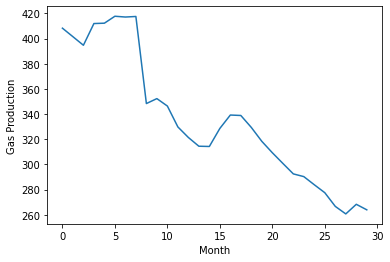

In [ ]:
# using random data for testing
# actual data can't be used due to confidentiality
data = [408.2705, 401.4993, 394.6971, 411.9468, 412.2339, 417.7495, 417.1236, 
        417.5629, 348.3705, 352.2979, 346.3852, 329.7893, 321.4138, 314.4597, 
        314.2554, 328.6006, 339.2441, 338.884, 329.3724, 318.3311, 309.2867, 
        300.8307, 292.4742, 290.309, 283.834, 277.5158, 266.6394, 260.6626, 
        268.3072,263.9177]
well_data = pd.Series(data)

ax = well_data.plot()
ax.set_xlabel('Month')
ax.set_ylabel('Gas Production')

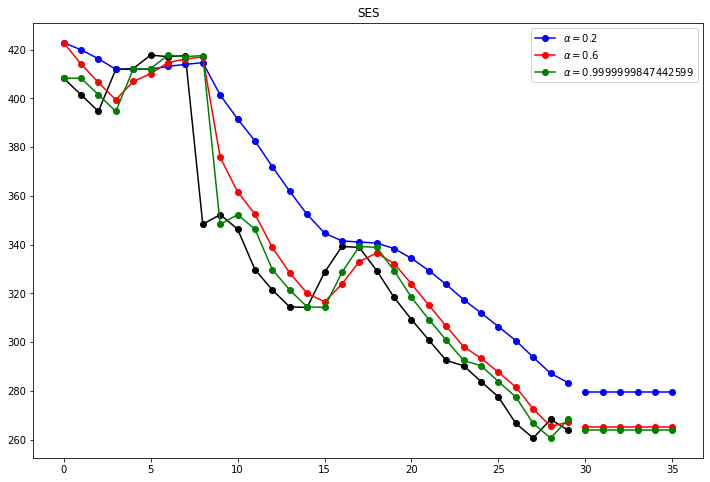

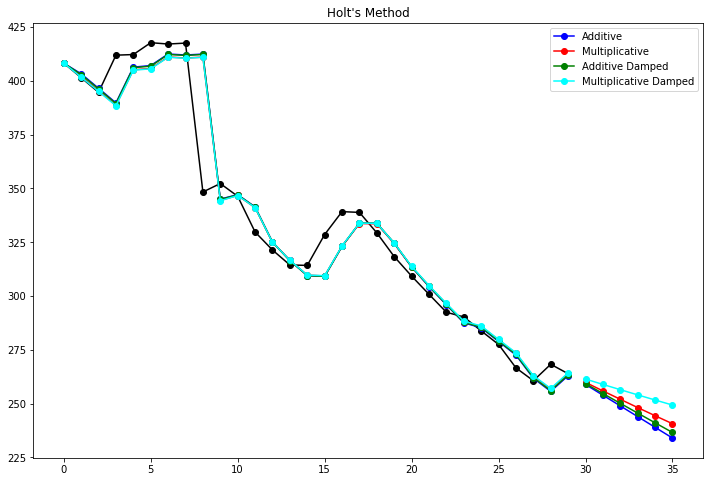

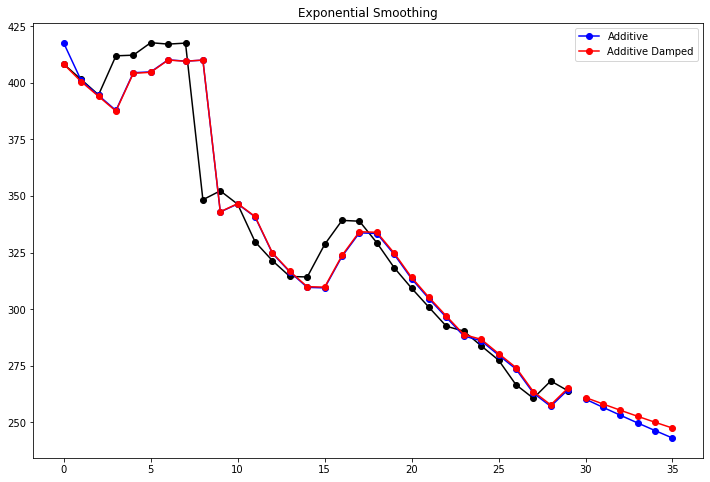

In [ ]:
ses_fit1, ses_fit2, ses_fit3 = ses(well_data)
holt_fit1, holt_fit2, holt_fit3, holt_fit4 = holt(well_data)
es_fit1, es_fit2 = es(well_data)

### 5. Results

In [ ]:
# viewing results
model_names = ['SES 0.2',
               'SES 0.6',
               'SES optim',
               'Holt\'s Additive',
               'Holt\'s Multiplicative',
               'Holt\'s Additive Damped',
               'Holt\'s Multiplicative Damped',
               'ES Additive',
               'ES Additive Damped']

params = [
    'smoothing_level',
    'smoothing_trend',
    'damping_trend',
    'initial_level',
    'initial_trend'
]

results = pd.DataFrame(index=['alpha', 'beta', 'phi', 'l_0', 'b_0', 'SSE'])

results[model_names[0]] = [ses_fit1.params[p] for p in params] + [ses_fit1.sse]
results[model_names[1]] = [ses_fit2.params[p] for p in params] + [ses_fit2.sse]
results[model_names[2]] = [ses_fit3.params[p] for p in params] + [ses_fit3.sse]

results[model_names[3]] = [holt_fit1.params[p] for p in params] + [holt_fit1.sse]
results[model_names[4]] = [holt_fit2.params[p] for p in params] + [holt_fit2.sse]
results[model_names[5]] = [holt_fit3.params[p] for p in params] + [holt_fit3.sse]
results[model_names[6]] = [holt_fit4.params[p] for p in params] + [holt_fit4.sse]

results[model_names[7]] = [es_fit1.params[p] for p in params] + [es_fit1.sse]
results[model_names[8]] = [es_fit2.params[p] for p in params] + [es_fit2.sse]

results

,SES 0.2,SES 0.6,SES optim,Holt's Additive,Holt's Multiplicative,Holt's Additive Damped,Holt's Multiplicative Damped,ES Additive,ES Additive Damped
alpha,0.200000,0.600000,1.000000,0.973991,9.770379e-01,9.743544e-01,0.979193,0.995000,0.995002
beta,NaN,NaN,NaN,0.000000,2.949755e-10,2.882368e-09,0.000026,0.000099,0.000073
phi,NaN,NaN,NaN,NaN,NaN,9.950000e-01,0.994984,NaN,0.990016
l_0,422.851200,422.851200,408.270507,413.200151,4.145781e+02,4.135685e+02,414.952348,1.699121,1.698438
b_0,NaN,NaN,NaN,-4.976880,9.847541e-01,-5.379413e+00,0.988851,-0.000585,-0.000637
SSE,27536.060817,9229.194588,6725.681867,6003.087382,5.929547e+03,6.004477e+03,5941.212543,5990.355742,5938.519767


In [ ]:
# getting best model - with minimum SSE
models = [ses_fit1, ses_fit2, ses_fit3, 
          holt_fit1, holt_fit2, holt_fit3, holt_fit4, 
          es_fit1, es_fit2]
sses = results.loc['SSE']

sses_dict = {}
for i in range(len(models)):
    sses_dict[models[i]] = sses[i]

min_sse = sses.min()
best_model_index = list(sses_dict.values()).index(min_sse)
best_model = list(sses_dict.keys())[best_model_index]

print(model_names[best_model_index])
print(min_sse)

Holt's Multiplicative
5929.547410282388


### 6. Forecasting

#### Test data

In [ ]:
# forecasting last 6 months with best model
forecast_df = pd.DataFrame(np.c_[well_data, best_model.level, best_model.fittedvalues], 
                           columns=['y', 'l', 'y_hat'], 
                           index=well_data.index)
forecast_df = forecast_df.append(best_model.forecast(n).rename('y_hat').to_frame(), sort=True)
forecast_df

,l,y,y_hat
0,408.270201,408.2705,408.257458
1,401.511848,401.4993,402.045762
2,394.713021,394.6971,395.390446
3,411.412897,411.9468,388.695273
4,412.071022,412.2339,405.140545
5,417.474854,417.7495,405.788636
6,416.985517,417.1236,411.110082
7,417.403665,417.5629,410.628206
8,349.809521,348.3705,411.039979
9,352.118301,352.2979,344.476367


In [ ]:
# mean of forecasted last 6 months 
forecast_df['y_hat'].tail(n).mean()

250.18814411884622

#### Actual data

In [ ]:
# forecasting last 6 months with best models
best_models = []
avgs = []

for w in old_wells_df.columns:
    well_data = old_wells_df[w]

    ses_fit1, ses_fit2, ses_fit3 = ses(well_data)
    holt_fit1, holt_fit2, holt_fit3, holt_fit4 = holt(well_data)
    es_fit1, es_fit2 = es(well_data)

    models = [ses_fit1, ses_fit2, ses_fit3, 
              holt_fit1, holt_fit2, holt_fit3, holt_fit4, 
              es_fit1, es_fit2]
    sses = [ses_fit1.sse, ses_fit2.sse, ses_fit3.sse, 
            holt_fit1.sse, holt_fit2.sse, holt_fit3.sse, holt_fit4.sse, 
            es_fit1.sse, es_fit2.sse]
    
    sses_dict = {}
    for i in range(len(models)):
        sses_dict[models[i]] = sses[i]

    best_model_index = list(sses_dict.values()).index(min(sses))
    # Holt's Additive giving negative values - replacing with SES 0.6
    if best_model_index == 3:
        best_model_index = 1
    best_model = list(sses_dict.keys())[best_model_index]

    best_models.append(model_names[best_model_index])
    avgs.append(best_model.forecast(n).mean())

In [ ]:
forecast_df = pd.read_csv('forecast.csv')
forecast_df['Last 6 Avg'] = avgs
forecast_df.to_csv('forecast1.csv')